<a href="https://www.kaggle.com/code/shubhamgupta012/football-league-dataset-analysis?scriptVersionId=135907302" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/70-football-leagues-data-2019-2023/ALLLEAGUESDATA.xlsx


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('/kaggle/input/70-football-leagues-data-2019-2023/ALLLEAGUESDATA.xlsx')
df.head()

,League,Season,Home Team,Away Team,Home Goals,Away Goals,Home FH,Away FH,Home Win,Draw,Away Win,"Over 2,5","Under 2,5",Code 1,Code 2,Total Goals,FH Goals,Winner,HT Winner
0,Eng1,20,Liverpool,Norwich,4,1,4,0,1140.0,10430.0,19630.0,1340,3440,1002,1011,5,4,H,H
1,Eng1,20,Tottenham,Aston Villa,3,1,0,1,1390.0,5350.0,8420.0,1580,2520,1001,1003,4,1,H,A
2,Eng1,20,C Palace,Everton,0,0,0,0,3370.0,3450.0,2270.0,2220,1740,1012,1017,0,0,D,D
3,Eng1,20,West Ham,Man City,0,5,0,1,11110.0,6680.0,1270.0,1430,3030,1022,1009,5,1,A,A
4,Eng1,20,Watford,Brighton,0,3,0,1,2050.0,3380.0,4120.0,2160,1780,1025,1036,3,1,A,A


In [4]:
df.shape

(63189, 19)

In [5]:
df.describe()

,Season,Home Goals,Away Goals,Home FH,Away FH,Home Win,Draw,Away Win,"Over 2,5","Under 2,5",Code 1,Code 2,Total Goals,FH Goals
count,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000,63189.000000
mean,21.562693,1.462517,1.197012,0.652408,0.529396,2723.550655,3813.055904,4080.404955,1980.246562,1978.342433,14555.952856,14555.944231,2.659529,1.181804
std,1.108266,1.263394,1.141881,0.818801,0.739860,1800.138466,998.734819,3131.574746,387.432481,442.517940,11877.290462,11877.281687,1.652328,1.082685
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.000000,1001.000000,0.000000,0.000000
25%,21.000000,1.000000,0.000000,0.000000,0.000000,1810.000000,3300.000000,2450.000000,1720.000000,1690.000000,3065.000000,3065.000000,1.000000,0.000000
50%,22.000000,1.000000,1.000000,0.000000,0.000000,2310.000000,3570.000000,3290.000000,1950.000000,1900.000000,13019.000000,13019.000000,2.000000,1.000000
75%,23.000000,2.000000,2.000000,1.000000,1.000000,3020.000000,3990.000000,4580.000000,2210.000000,2180.000000,24022.000000,24022.000000,4.000000,2.000000
max,23.000000,13.000000,13.000000,7.000000,7.000000,47370.000000,17980.000000,76000.000000,4500.000000,8000.000000,41021.000000,41021.000000,13.000000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63189 entries, 0 to 63188
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       63189 non-null  object 
 1   Season       63189 non-null  int64  
 2   Home Team    63189 non-null  object 
 3   Away Team    63189 non-null  object 
 4   Home Goals   63189 non-null  int64  
 5   Away Goals   63189 non-null  int64  
 6   Home FH      63189 non-null  int64  
 7   Away FH      63189 non-null  int64  
 8   Home Win     63189 non-null  float64
 9   Draw         63189 non-null  float64
 10  Away Win     63189 non-null  float64
 11  Over 2,5     63189 non-null  int64  
 12  Under 2,5    63189 non-null  int64  
 13  Code 1       63189 non-null  int64  
 14  Code 2       63189 non-null  int64  
 15  Total Goals  63189 non-null  int64  
 16  FH Goals     63189 non-null  int64  
 17  Winner       63189 non-null  object 
 18  HT Winner    63189 non-null  object 
dtypes: f

In [7]:
df.dtypes

League          object
Season           int64
Home Team       object
Away Team       object
Home Goals       int64
Away Goals       int64
Home FH          int64
Away FH          int64
Home Win       float64
Draw           float64
Away Win       float64
Over 2,5         int64
Under 2,5        int64
Code 1           int64
Code 2           int64
Total Goals      int64
FH Goals         int64
Winner          object
HT Winner       object
dtype: object

In [8]:
df.isnull().sum()

League         0
Season         0
Home Team      0
Away Team      0
Home Goals     0
Away Goals     0
Home FH        0
Away FH        0
Home Win       0
Draw           0
Away Win       0
Over 2,5       0
Under 2,5      0
Code 1         0
Code 2         0
Total Goals    0
FH Goals       0
Winner         0
HT Winner      0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Value Counts

In [10]:
bold = "\033[1m"
reset = "\033[0m"

In [11]:
 for col in df.columns:
        print(f"{bold}Value Counts of {col}{reset}")
        print(f"{bold}Column: {col}{reset}")
        print(df[col].value_counts())
        print("\n")

Value Counts of League
Column: League
Eng2    2208
Eng4    2096
Eng3    2056
Eng5    1971
Spa2    1848
        ... 
Ser2     240
Rom2     190
Chi2     170
Bel2     132
Cro2     132
Name: League, Length: 71, dtype: int64


Value Counts of Season
Column: Season
23    16747
22    16346
21    15812
20    14284
Name: Season, dtype: int64


Value Counts of Home Team
Column: Home Team
Newcastle                   126
Gorica                      108
Everton                      99
Arsenal                      97
Millwall                     92
                           ... 
Yanbian                       5
Shanghai Jiading Huilong      4
Qingdao Youth Island          4
Jinan Xingzhou                4
Heilongjiang Ice City         3
Name: Home Team, Length: 1379, dtype: int64


Value Counts of Away Team
Column: Away Team
Newcastle              127
Gorica                 108
Arsenal                101
Everton                 98
Reading                 92
                      ... 
Dongguan Guanli

In [12]:
df.head(10)

,League,Season,Home Team,Away Team,Home Goals,Away Goals,Home FH,Away FH,Home Win,Draw,Away Win,"Over 2,5","Under 2,5",Code 1,Code 2,Total Goals,FH Goals,Winner,HT Winner
0,Eng1,20,Liverpool,Norwich,4,1,4,0,1140.0,10430.0,19630.0,1340,3440,1002,1011,5,4,H,H
1,Eng1,20,Tottenham,Aston Villa,3,1,0,1,1390.0,5350.0,8420.0,1580,2520,1001,1003,4,1,H,A
2,Eng1,20,C Palace,Everton,0,0,0,0,3370.0,3450.0,2270.0,2220,1740,1012,1017,0,0,D,D
3,Eng1,20,West Ham,Man City,0,5,0,1,11110.0,6680.0,1270.0,1430,3030,1022,1009,5,1,A,A
4,Eng1,20,Watford,Brighton,0,3,0,1,2050.0,3380.0,4120.0,2160,1780,1025,1036,3,1,A,A
5,Eng1,20,Burnley,Southampton,3,0,0,0,2710.0,3190.0,2900.0,2190,1760,1030,1004,3,0,H,D
6,Eng1,20,Bournemouth,Sheffield,1,1,0,0,1980.0,3670.0,4060.0,1940,1970,1063,1024,2,0,D,D
7,Eng1,20,Newcastle,Arsenal,0,1,0,0,3360.0,3560.0,2250.0,1830,2090,1016,1018,1,0,A,D
8,Eng1,20,Man Utd,Chelsea,4,0,1,0,2040.0,3440.0,4140.0,2050,1880,1020,1019,4,1,H,H
9,Eng1,20,Leicester,Wolves,0,0,0,0,2500.0,3120.0,3300.0,2450,1630,1042,1031,0,0,D,D


# Creating new columns 

In [13]:
df['Winner Team'] = ''

In [14]:
df.loc[df['Winner'] == 'H', 'Winner Team'] = df['Home Team']
df.loc[df['Winner'] == 'A', 'Winner Team'] = df['Away Team']
df.loc[df['Winner'] == 'D', 'Winner Team'] = 'Draw'

In [15]:
df['Halftime Winner'] = ''
df.loc[df['HT Winner'] == 'H', 'Halftime Winner'] = df['Home Team']
df.loc[df['HT Winner'] == 'A', 'Halftime Winner'] = df['Away Team']
df.loc[df['HT Winner'] == 'D', 'Halftime Winner'] = 'Draw'

# Pie charts

Text(0.5, 1.0, 'Winner of match is Home/Away team at HalfTime')

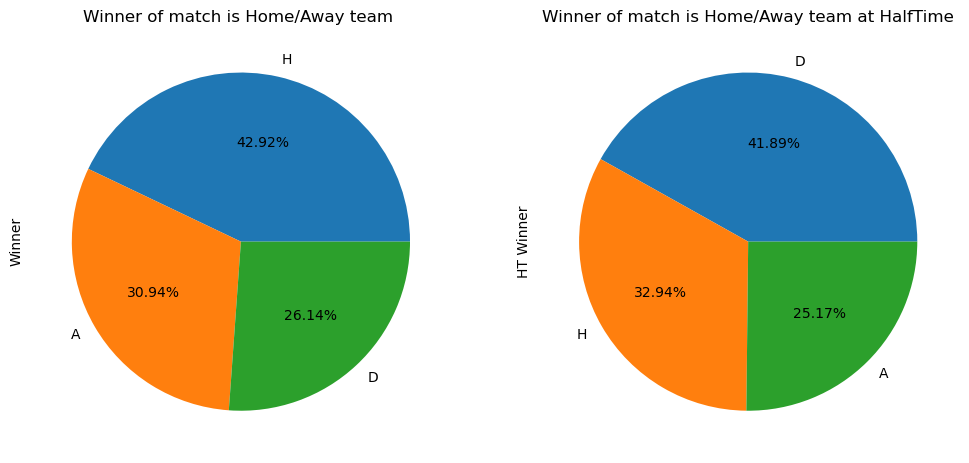

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df['Winner'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Winner of match is Home/Away team ')
plt.subplot(1,2,2)
df['HT Winner'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Winner of match is Home/Away team at HalfTime')

Text(0.5, 1.0, 'Total Goals of Home/Away team at HalfTime')

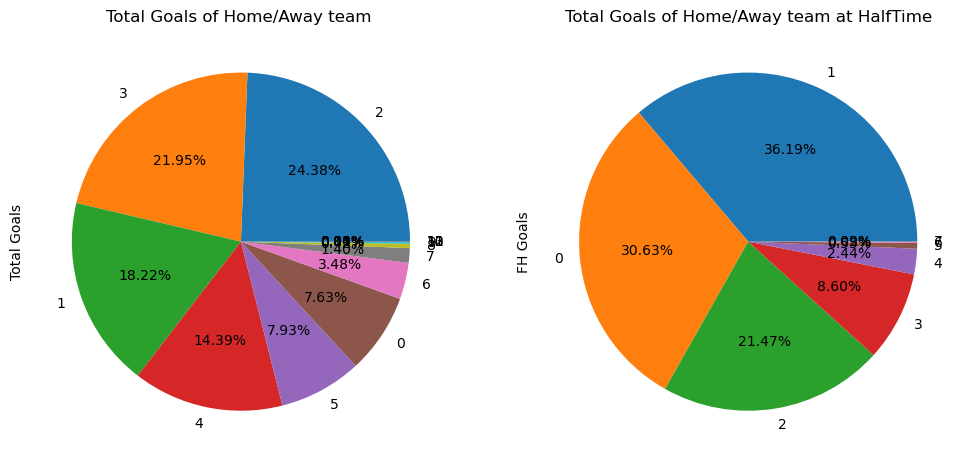

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df['Total Goals'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Total Goals of Home/Away team ')
plt.subplot(1,2,2)
df['FH Goals'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Total Goals of Home/Away team at HalfTime')

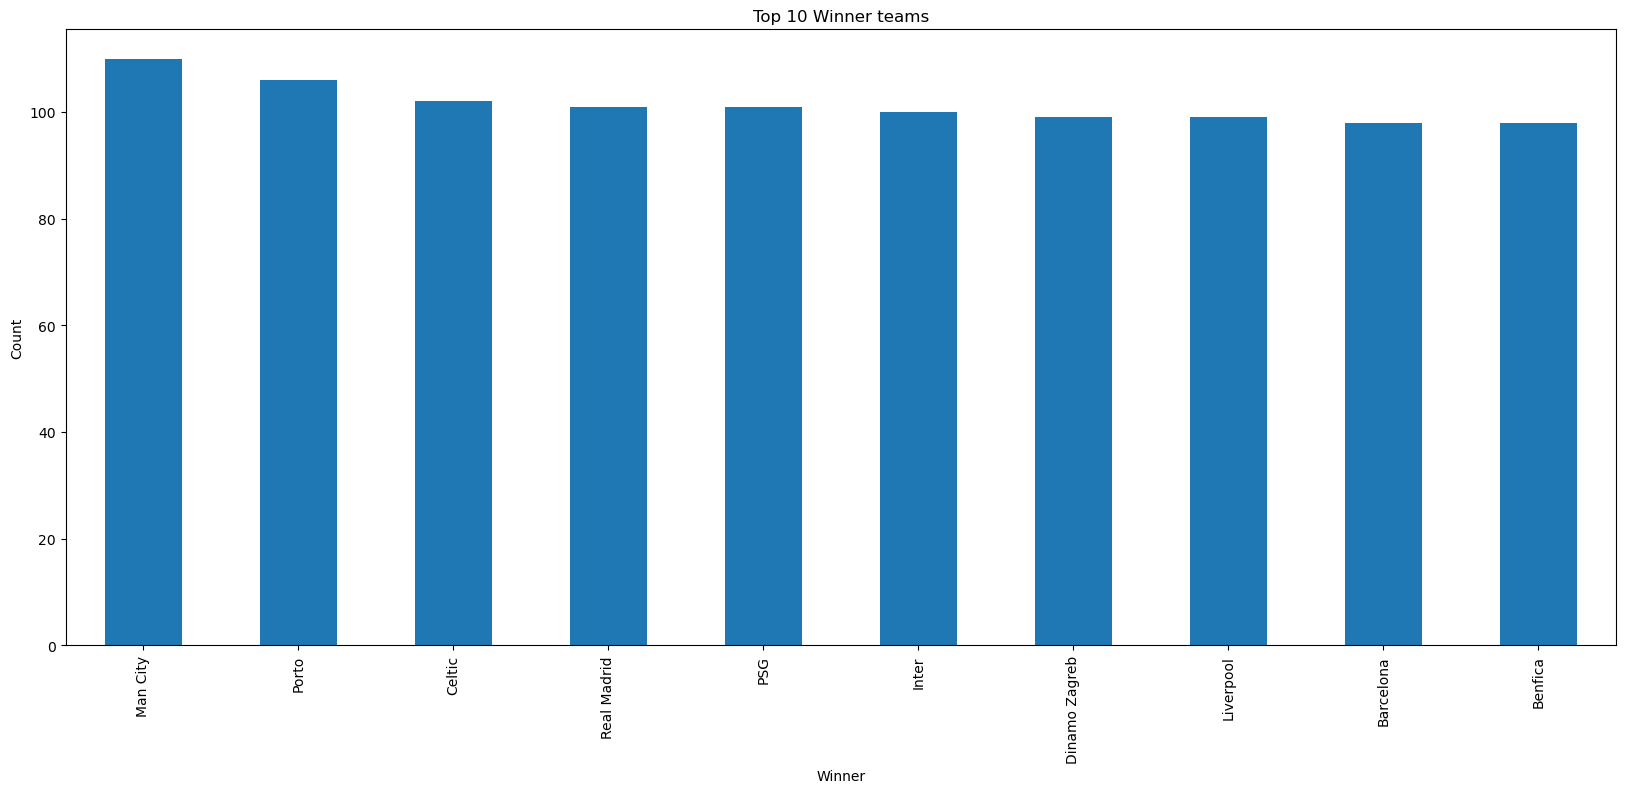

In [18]:
winner_counts = df['Winner Team'].value_counts().head(11)
winner = winner_counts[1:]
# Plotting the bar graph
plt.figure(figsize=(20,8))
winner.plot(kind='bar')
plt.title('Top 10 Winner teams')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


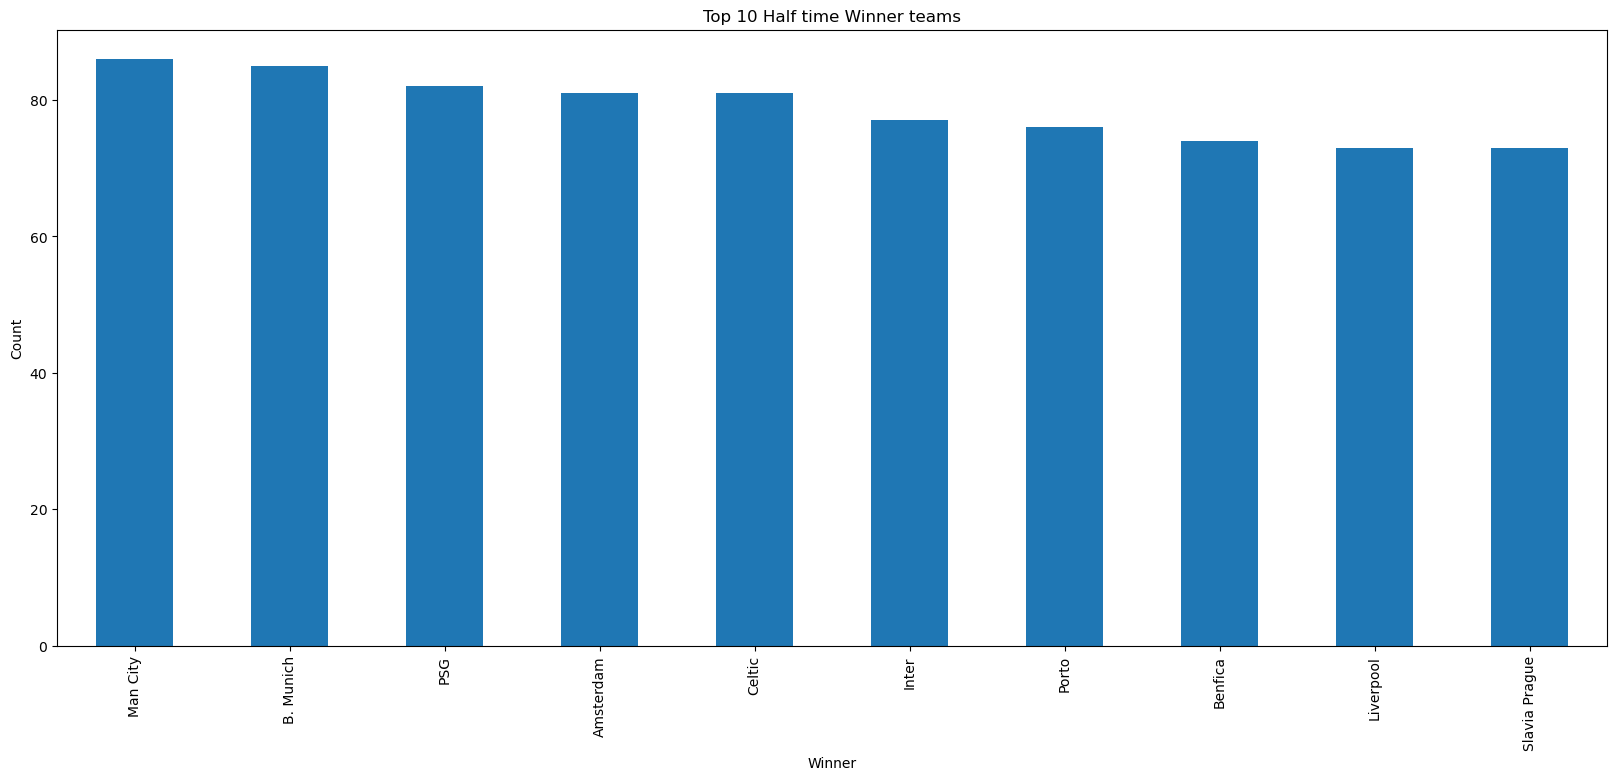

In [19]:
winner_counts = df['Halftime Winner'].value_counts().head(11)
winner = winner_counts[1:]
plt.figure(figsize=(20,8))
winner.plot(kind='bar')
plt.title('Top 10 Half time Winner teams')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

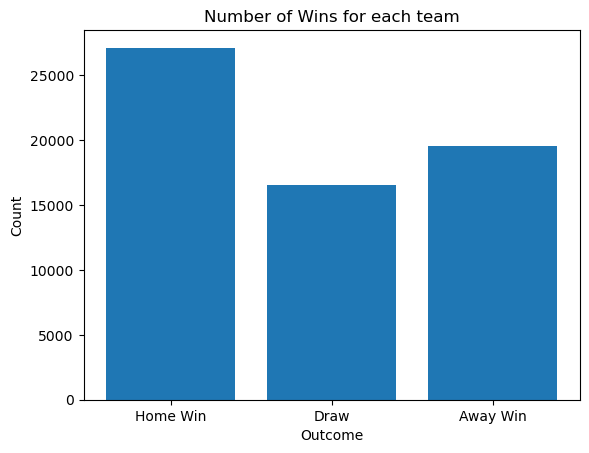

In [20]:
wins = ['Home Win', 'Draw', 'Away Win']
count = [df['Winner'].value_counts()['H'], df['Winner'].value_counts()['D'], df['Winner'].value_counts()['A']]

plt.bar(wins, count)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Number of Wins for each team')
plt.show()


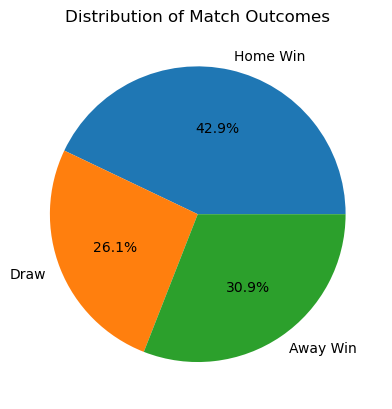

In [21]:
outcomes = ['Home Win', 'Draw', 'Away Win']
counts = [df['Winner'].value_counts()['H'], df['Winner'].value_counts()['D'], df['Winner'].value_counts()['A']]
plt.pie(counts, labels=outcomes, autopct='%1.1f%%')
plt.title('Distribution of Match Outcomes')
plt.show()

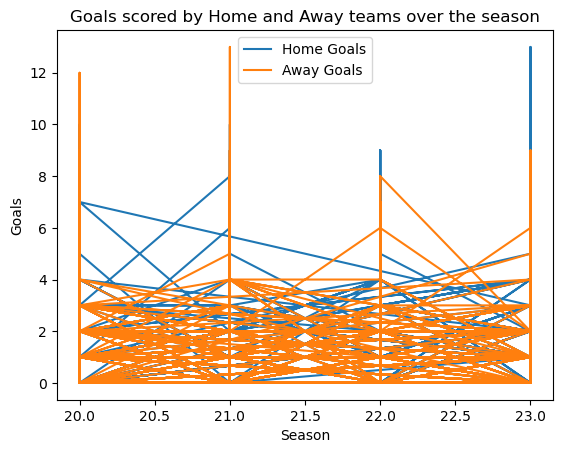

In [22]:
seasons = df['Season']
home_goals = df['Home Goals']
away_goals = df['Away Goals']

plt.plot(seasons, home_goals, label='Home Goals')
plt.plot(seasons, away_goals, label='Away Goals')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Goals scored by Home and Away teams over the season')
plt.legend()
plt.show()


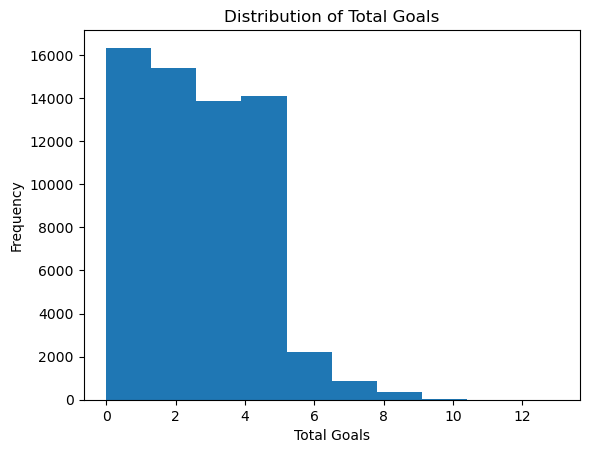

In [23]:
total_goals = df['Total Goals']

plt.hist(total_goals, bins=10)
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Total Goals')
plt.show()

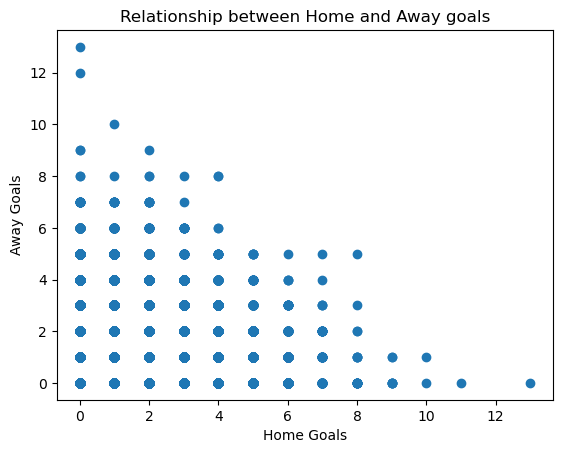

In [24]:
home_goals = df['Home Goals']
away_goals =df['Away Goals']

plt.scatter(home_goals, away_goals)
plt.xlabel('Home Goals')
plt.ylabel('Away Goals')
plt.title('Relationship between Home and Away goals')
plt.show()

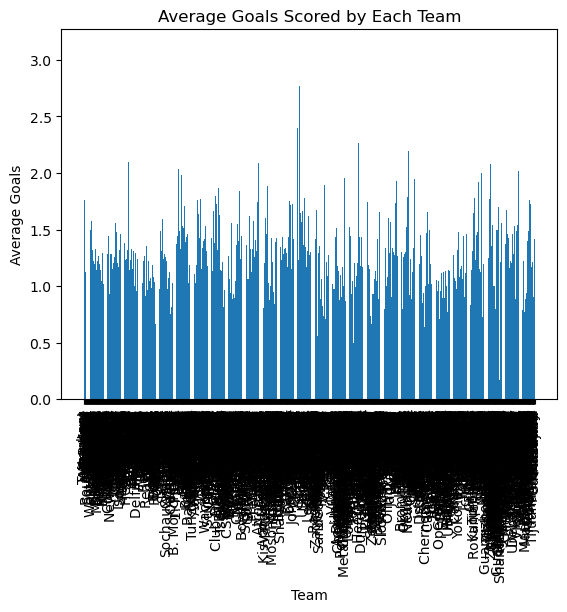

In [25]:
teams = df['Home Team'].unique()
average_goals = []
for team in teams:
    home_avg = np.mean(df[df['Home Team'] == team]['Home Goals'])
    away_avg = np.mean(df[df['Away Team'] == team]['Away Goals'])
    average_goals.append((home_avg + away_avg) / 2)

plt.bar(teams, average_goals)
plt.xlabel('Team')
plt.ylabel('Average Goals')
plt.title('Average Goals Scored by Each Team')
plt.xticks(rotation=90)
plt.show()

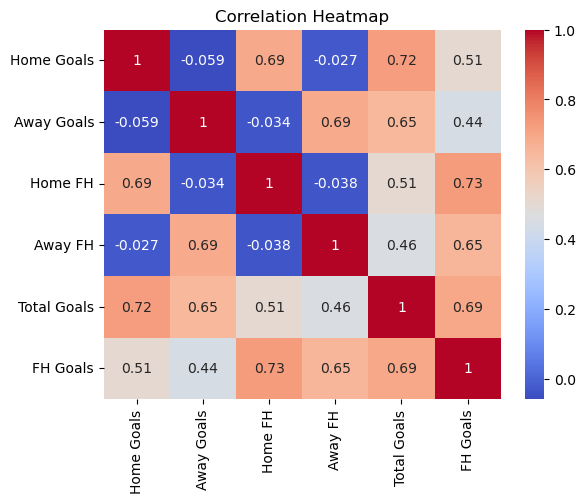

In [26]:
numeric_cols = ['Home Goals', 'Away Goals', 'Home FH', 'Away FH', 'Total Goals', 'FH Goals']

correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

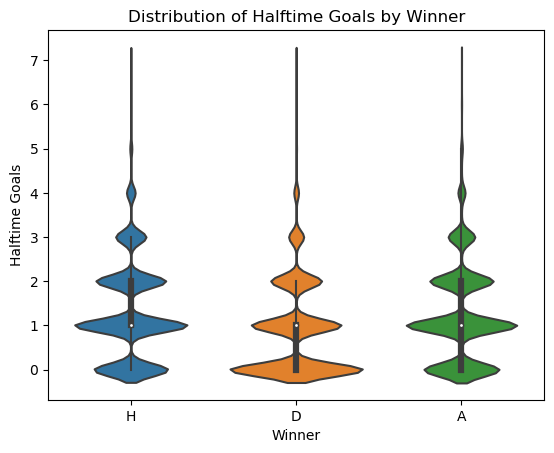

In [27]:
winner = df['Winner']
halftime_goals = df['FH Goals']
sns.violinplot(x=winner, y=halftime_goals)
plt.xlabel('Winner')
plt.ylabel('Halftime Goals')
plt.title('Distribution of Halftime Goals by Winner')
plt.show()

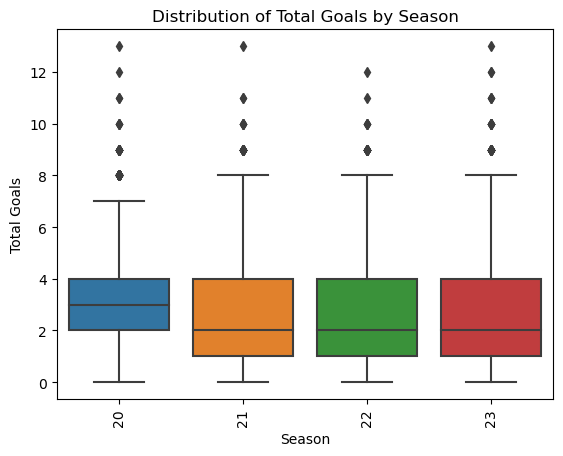

In [28]:
total_goals = df['Total Goals']
seasons = df['Season']
sns.boxplot(x=seasons, y=total_goals)
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.title('Distribution of Total Goals by Season')
plt.xticks(rotation=90)
plt.show()

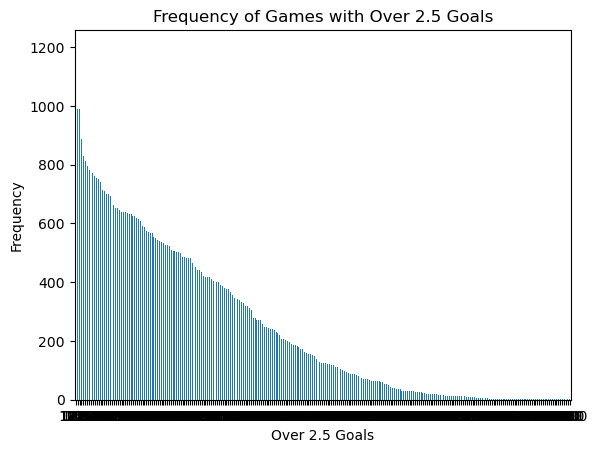

In [29]:
over_2_5_counts = df['Over 2,5'].value_counts()
over_2_5_counts.plot(kind='bar')
plt.xlabel('Over 2.5 Goals')
plt.ylabel('Frequency')
plt.title('Frequency of Games with Over 2.5 Goals')
plt.xticks(rotation=0)
plt.show()

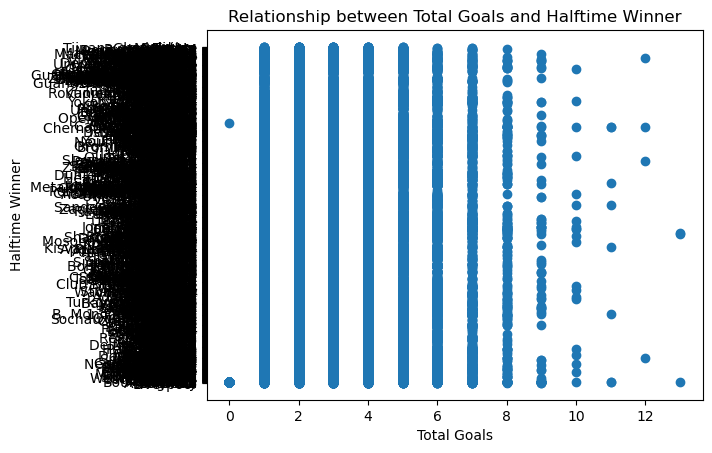

In [30]:
total_goals = df['Total Goals']
ht_winner = df['Halftime Winner']
plt.scatter(total_goals, ht_winner)
plt.xlabel('Total Goals')
plt.ylabel('Halftime Winner')
plt.title('Relationship between Total Goals and Halftime Winner')
plt.show()

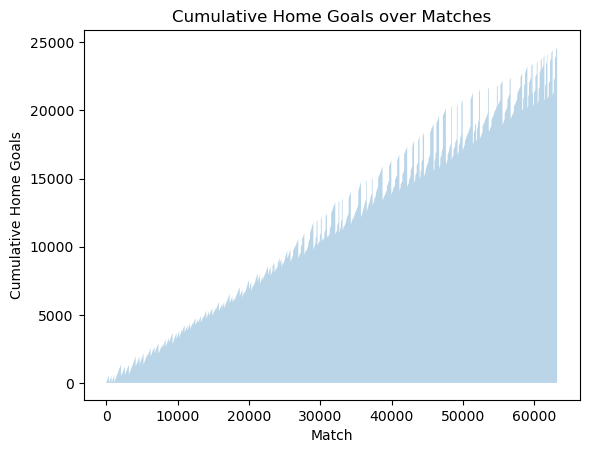

In [31]:
cumulative_home_goals = df.groupby('Season')['Home Goals'].cumsum()
plt.fill_between(range(len(df)), cumulative_home_goals, alpha=0.3)
plt.xlabel('Match')
plt.ylabel('Cumulative Home Goals')
plt.title('Cumulative Home Goals over Matches')
plt.show()

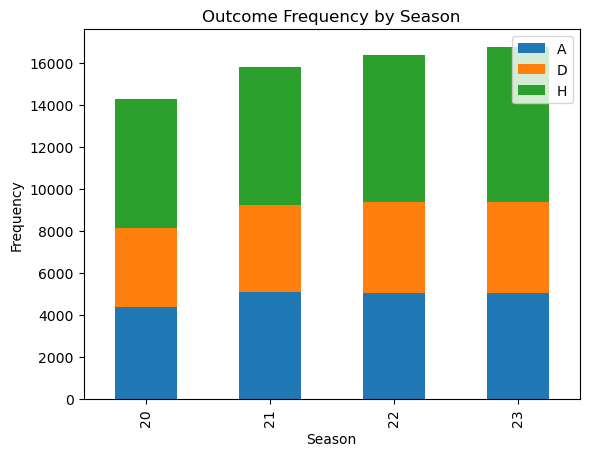

In [32]:
outcome_counts = df.groupby(['Season', 'Winner']).size().unstack()
outcome_counts.plot(kind='bar', stacked=True)
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Outcome Frequency by Season')
plt.legend(loc='upper right')
plt.show()